In [ ]:


import fitz  
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt 



In [27]:
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text")
    return text

In [ ]:

predefined_skills = [
    'Python', 'Java', 'C++', 'JavaScript', 'HTML', 'CSS', 'SQL', 'Machine Learning', 'Data Science', 'Django', 'Flask', 'React', 'Node.js', 'AWS', 'GCP'
]
def extract_skills(resume_text, predefined_skills):
    resume_text = resume_text.lower()
    extracted_skills = [skill for skill in predefined_skills if skill.lower() in resume_text]
    return extracted_skills


Resume Extracted Text: GIRISH HR
+91 9591072004 | hrg5134@gmail.com | linkedin.com/in/girish | github.com/girish | leetcode.com/u/girish
EXPERIENCE
Software Developer Intern
Apr 2024 - Aug 2024
Phyniks W, Bangalore, India
• Developed an AI-powered Chrome extension with a team of 4 using Next.js and TypeScript to convert website
content into concise vlogs, simplifying complex information for better comprehension and engagement.
• Converted detailed 5 pages of Figma designs into accurate, production-ready code, ensuring the ﬁnal product met
client expectations and provided a seamless user experience.
• Integrated Google OAuth for secure user authentication and Stripe for managing subscription payments,
enhancing overall application functionality by 30%.
• Designed advanced features like data caching for instant access to recent vlogs and background fetching features,
reducing free trial wastage by 50% during usability testing.
PROJECTS
BITES&BRIEF W | Û Demo | React, Tailwind, Express, G

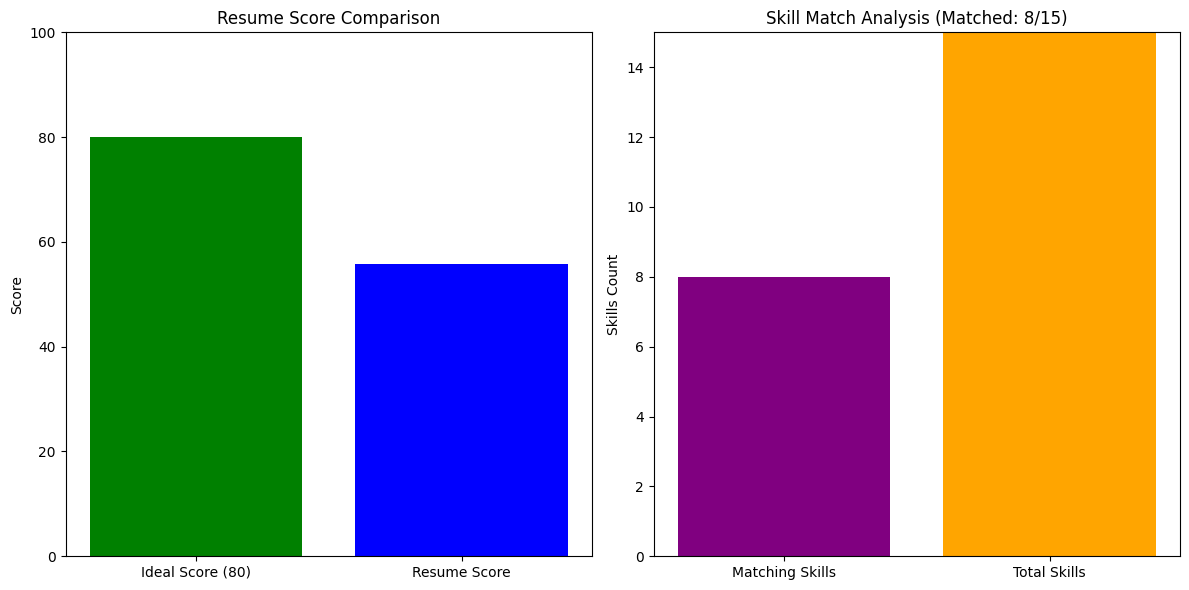

In [ ]:

def compute_similarity_score(extracted_skills, predefined_skills):
    resume_skills_str = ' '.join(extracted_skills)
    predefined_skills_str = ' '.join(predefined_skills)
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([resume_skills_str, predefined_skills_str])
    similarity_matrix = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
    return similarity_matrix[0][0]  

def final_score(similarity_score):
    return similarity_score * 100

def plot_score(ideal_score, resume_score, matching_skills_count, total_skills_count):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  
    plt.bar(['Ideal Score (80)', 'Resume Score'], [ideal_score, resume_score], color=['green', 'blue'])
    plt.ylim(0, 100)
    plt.ylabel('Score')
    plt.title('Resume Score Comparison')

    plt.subplot(1, 2, 2) 
    plt.bar(['Matching Skills', 'Total Skills'], [matching_skills_count, total_skills_count], color=['purple', 'orange'])
    plt.ylim(0, total_skills_count)
    plt.ylabel('Skills Count')
    plt.title(f'Skill Match Analysis (Matched: {matching_skills_count}/{total_skills_count})')

    plt.tight_layout()
    plt.show()

pdf_path = input("Enter the path to the resume PDF: ")
pdf_path = pdf_path.strip().replace("\\", "/") 

resume_text = extract_text_from_pdf(pdf_path)
print("Resume Extracted Text:", resume_text[:1000])  

extracted_skills = extract_skills(resume_text, predefined_skills)
print("Extracted Skills from Resume:", extracted_skills)

matching_skills_count = len(extracted_skills)
total_skills_count = len(predefined_skills)

similarity_score = compute_similarity_score(extracted_skills, predefined_skills)
print("Resume Skill Match Score:", similarity_score)

score = final_score(similarity_score)
print("Final Resume Score (0-100):", score)

ideal_score = 80
plot_score(ideal_score, score, matching_skills_count, total_skills_count)
